In [1]:
# Import of libraries we are going to use
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from sklearn.datasets import make_moons

from IPython.display import display, HTML, IFrame
import io
import base64

# Introduction

- ### What is the goal of the project?

Create simple neural network from scratch without using any third party libraries like PyTorch or TensorFlow. 

- ### What kind of neural network is build?

A simple neural network that predicts and classifies whether a given point belongs to one of two distinct clusters

- ### What kind of data will it be trained on?

The data we are going to provide to the network will be generated with the help of Scikit-learn - open source library for generating machine learning datasets

- ### What are the learning objectives

> - Understanding how a neural network works
> - Understanding how a neural network has to be trained
> - Practise applying matrix operations
> - Understanding feed forward and backward propagation operations
> - Train the network to solve basic classification tasks

- ### Legend with namings and variables we are going to use
> - $n$ - node
> - $w$ - weight
> - $l$ - layer
> - $W^{[l]}$ - weight matrix - $n^{[l]}$ dot $n^{[l-1]}$
> - $b$ - bias
> - $g(n)$ - activation function
> - $\sigma(n)$ - sigmoid function
> - $a$ - layer activation parameter [x_point_coord, y_point_coord] $a^{[l]}$ = $g(z^{[l]})$
> - $z$ - feed forward process $z^{[l]}$= $W^{[l]} * a^{[l-1]} + b^{[l]}$
> - $\large ŷ$ (y 'hat') - output
> - $n$ - number of variables (features) - same as the nodes of the input layer
> - $m$ - training samples
> - $n$ x $m$ - features * training samples
> - $X$ - matrix of training input data - $n^{[0]}$ x $m$
> - $A$ - vectorised X ($A^{[0]}$)
> - $C$ - cost
> - $∇C$ - gradient of cost
> - $dC_dW3$ - the partial derivative of the cost with respect to the weights in layer 3. We use this value to adjust the weights in layer 3.
> - $dC_db3$ - the partial derivative of the cost with respect to the biases in layer 3. We use this value to adjust the biases in layer 3.
> - $dC_dA2$ - the propagator term that lets us continue the chain so we can calculate the derivatives in layer 2.

# Neural Network Architecture

The network we are going to build has the following structure: <br>

> - **Input layer** - The raw input of the model.
> - **Hidden layers** - Two layers to interpret what the input layer means — raw input — and what the output layer means — the network’s output.
> - **Output layer** - The last layer is the output layer, which should output the prediction of the network.

To vizualize better the architecture a diagram is provided. Along with the diagram we will see the python code that generates it, but first lets describe what the image tell us.

<div style="text-align: center;">
  <img src="1.png" alt="image" width="500">
</div>

Thats it! Now we have the network schema with all the nodes and connections between them. For counting nodes, we represent the number of nodes in each layer with $n^{[l]}$, where $l$ is the layer number. For this, you can optionally include the input layer, which we would represent with 0. Lets write down all the layer size notations for all layer numbers.

$$\large n^{[0]} = 2, n^{[1]} = 3, n^{[2]} = 3, n^{[3]} = 1$$

$\large n^{[0]}$ represents the number of nodes in the input layer, $\large n^{[1]}$ represents the number of nodes in the first hidden layer, $\large n^{[2]}$ represents the number of nodes in the 2nd hidden layer, and $\large n^{[3]}$ represents the number of nodes in 3rd hidden layer.

The connections between nodes are called **Weights**. Let’s walk through our thinking:

> - Each node in the 0th layer connects to every node in the 1st layer.
> - There are three nodes in the 1st layer, so each node in the 0th layer has 3 connections.
> - There are 2 nodes in the 0th layer, so we have 3*2 = 6 connections, meaning there are 6 weights total.

We found out how many weights there are in between the 0th and 1st layers, but we can expand that for any layer.

> - For any layer $\large l$, there will always be $\large n^{[l]} * n^{[l-1]}$ weights connecting those two layers

Now this information we can use to find the value of a node in the next layer. How? Matrices! Lets look at the diagram below and add some random values for the nodes and the weights with respect of the input layer.

<div style="text-align: center;">
  <img src="2.png" alt="image" width="600">
</div>

Lets convert the picture to mathematical expression. We have to be carefull to match the matrix dimentions! If the dimentions does not match, we are free to transpose them. Just quick check. The input layer is $\left[ \begin{array}{c} 2 \\ 3 \end{array} \right]$ - 2 x 1 matrix. Layer 1 - 2 x 3 matrix. We were right to ask this question. The dimentions does not match. Lets transpose the matrix from the input layer. Then we get the proper dimensions - 1 x 2 by 2 x 3 and we can continue with the dot product.

$$\large
\left[ 
\begin{array}{cc}
2 & 3
\end{array}
\right]
\left[ 
\begin{array}{cc}
5 & 6 & 7 \\
8 & 9 & 10 \\
\end{array}
\right] = 
\left[ 
\begin{array}{cc}
2*5 + 3*8 \\
2*6 + 3*9 \\
\:\:2*7 + 3*10 \\
\end{array}
\right]
$$

Now we can describe the dimensions of the weight matrix for any layer $\large l$ connecting the previous layer $\large l-1$. 

Using the previous formula, we can find the dimensions of all the weights in the network:
> - $W^{[1]}$ : 3 x 2 matrix
> - $W^{[2]}$ : 3 x 3 matrix
> - $W^{[3]}$ : 1 x 3 matrix

Next step is to introduce **Biases**. Bias is an additional,random, greater than zero parameter added to the weighted sum of inputs in a neuron. It helps the neuron activate even when all inputs are zero and allows the network to represent patterns that do not pass through the origin. This improves the model's ability to fit the data.
The nodes in the input layer will NOT have any biases, but every node in each next layer will have. Let's look at the example with the notations for 0th and 1st layers

<div style="text-align: center;">
  <img src="3.png" alt="image" width="600">
</div>

For any layer $\large l$, the bias matrix $\large b^{[l]}$ has dimensions $\large n^{[l]}$ x 1. For now, let’s represent the matrix of nodes in a layer as $\large z^{[l]}$ for some layer $l$ and write out what we know:

> - $\large z^{[0]}$ : the 2 x 1 matrix of elements [2, 3], representing the 0th layer.
> - $\large z^{[1]}$ : the 3 x 1 matrix representing the 1st layer.
> - $\large W^{[1]}$ : the 3 x 2 matrix representing the weights connecting the 1st layer and 0th layer.
> - $\large b^{[1]}$ : the 3 x 1 matrix of elements [1, 4, 6], representing the biases for the 1st layer.

Now we’ll use notation to describe the calculations instead of numbers:
$$\Large W^{[1]}z^{[0]} + b^{[1]} = z^{[1]}$$

Just so we can double check the math:
$$\large
\left[ 
\begin{array}{cc}
5 & 8 \\
6 & 9 \\
7 & 10 \\
\end{array}
\right]
\left[ 
\begin{array}{cc}
2 \\
3 \\
\end{array}
\right] + 
\left[ 
\begin{array}{cc}
1 \\
4 \\
6 \\
\end{array}
\right] = 
\left[ 
\begin{array}{cc}
35 \\
43 \\
50 \\
\end{array}
\right]
$$

Next building block is the **Activation function**. What is this animal and does it have soil in our village?
Once we get a value for the neuron with the weight matrix multiplication and bias addition, we need to squish that value down into something our networks can deal with. Аctivation functions do this modification. There are two important attributes an activation function must have:

> - Must be nonlinear, as in it CANNOT be in the form g(z) = mz + b.
> - Must compress the input to a predetermined range, like 0 to 1.

For our project we will be using the **Sigmoid** function which looks like so:

<div style="text-align: center;">
  <img src="4.png" alt="image" width="550">
</div>

We will use this equation because it most closely models how a real neuron works: they are either on or off, but also have a small transition window that’s kind of a half-on half-off thing. Now that we have an activation function, we can go back to our network from before:

<div style="text-align: center;">
  <img src="5.png" alt="image" width="500">
</div>

When we pass in 35 into $\large g(x) = \frac{1}{1 + e^{-x}}$, we get g(35) = 0.99. For 43 into g(z), we get 0.99 and for g(50) = 0.99.
Now we can actually represent the 1st layer as it truly is: $\large a^{[1]}$ = [0.99, 0.99, 0.99].
Let’s put these calculations into a formula:

$$\large a^{[1]} = g(z^{[1]}) $$

Before we completely generalize for any layer $l$, we have to talk about **Inputs** and **Outputs**. Going back to the tenets of machine learning, we need data for a machine to learn. Returning to the task our model going to perform there are two inputs - coordinates of a point. It's $x$ and $y$ values. This is represented as i x 2 matrix, where $i$ is the number of traning samples. We notate the matrix of input data as $X$. The output matrix will be notated as $Y$. Since the output data was a 1 dimensional vector, it’s better to make it a matrix with 1 column since that makes the math easier. This is machine learning in a nutshell — we provide the inputs and outputs so the neural network can learn the patterns, and then generalize to new inputs that nobody knows the answers to. Why is this important? Because we’ll make $X$ as the input layer for our network, giving our network feeding in the entire training data.

Introducing the process that will wrap everything we described for now - **Feed forward process**. It has these steps:

> - To compute the input to the current layer, multiply the weight matrix by the activations from the previous layer, and add the bias vector. This gives us the pre-activated node values for a layer $\large l$, $\large z^{[l]}$.
> - Pass in the pre-activated layer $\large z^{[l]}$ into sigmoid activation function g(z) to get $\large a^{[l]}$. This represents the final values of nodes in a layer.

So the generalized Feed forward process has the following equation:

$$\large z^{[l]} = W^{[l]}a^{[l-1]} + b^{[l]} $$
$$\large a^{[l]} = g(z^{[l]}) $$

Once we get to the last layer $L=3$ we will get the final output. The notitaion for this single output is $\large ŷ$ (y 'hat'). $\large ŷ$ represents the prediction of the network, and we compare ŷ to y (the true values we are testing the model on) to create an error metric for the model that measures how poorly the network predicts the stuff we want. If the network predicts that certain point, has a 0.72 probability of being part of cluster 1, but it turns out that the point belong to cluster 0. So when we compare our predicted value $\large ŷ$ = 0.72 to $\large y$ = 0, then the cost for our model (predicted-expected) is equals 0.72. Getting a cost of 0 means that our predicted value $\large ŷ$ should be exactly equal to $\large y$, that means the cost $\large ŷ-y = 0$, which is what we want. Before we write the code for the feed forward process, let’s talk it through:

> - Randomly initialize the weights and biases for the network.
> - Do the feed forward process for each training sample.
> - Get the ŷ at the end of the feed forward process for each training sample.
> - Come up with a cost metric for the network across all training samples.

Since we have to train and correct the model through feeding process, we have to come up with cost calculation. Cost calculations are only easy if we can vectorize across all training samples. Let’s revisit the all the records of x and y data. The matrix of training input data we called X had dimensions i x 2. This is what it means to vectorize our training data — instead of looping and doing the feed forward process for all training samples, we do the feed forward on all the training data at once. To make the future math цоррецт анд easier, we transpose X into a 2 x i matrix, or more commonly referred to as n x m, where n is the number of features and m is the number of training samples. As we can notice the features are exactly as the number of inputs we have in our neural network. Features, input layer, X — all interchangeable. Then, we have:

> - $X$ : the $\large n^{[0]}$ x m matrix of training data. The same thing as the input layer.
> - $A^{[0]}$ : the same thing as $X$, just notated differently for the feed forward formula. It’s just the input layer vectorized across all training samples to have a dimension $\large n^{[0]}$ x m.

After vectorization we can revisit our equation for the Feed forward process:

$$\large Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]}$$
$$\large A^{[l]} = g(Z^{[l]})$$

> - $Z^{[l]}$ : pre-activated values for layer $\large l$, vectorized across all training samples. Has dimensions $n^{[l]}$ x m.
> - $A^{[l]}$ : node values for layer $\large l$, vectorized across all training samples. Has dimensions $n^{[l]}$ x m.
> - $A^{[l-1]}$ : node values for layer $\large l-1$, vectorized across all training samples. Has dimensions $n^{[l-1]}$ x m.

It's time to prepare the Feed Forward process and write some code of the architecture

In [2]:
# 1. Create network architecture
L = 3 # number of layers
n = [2, 3, 3, 1] # layer distribution
epochs = 10000 # training iterations

print("layer 0 / input layer size", n[0])
print("layer 1 size", n[1])
print("layer 2 size", n[2])
print("layer 3 size", n[3])

layer 0 / input layer size 2
layer 1 size 3
layer 2 size 3
layer 3 size 1


In [3]:
# 2. Create weights and biases
W1 = np.random.randn(n[1], n[0])
W2 = np.random.randn(n[2], n[1])
W3 = np.random.randn(n[3], n[2])
b1 = np.random.randn(n[1], 1)
b2 = np.random.randn(n[2], 1)
b3 = np.random.randn(n[3], 1)

print("Weights for layer 1 shape:", W1.shape)
print("Weights for layer 2 shape:", W2.shape)
print("Weights for layer 3 shape:", W3.shape)
print("bias for layer 1 shape:", b1.shape)
print("bias for layer 2 shape:", b2.shape)
print("bias for layer 3 shape:", b3.shape)

Weights for layer 1 shape: (3, 2)
Weights for layer 2 shape: (3, 3)
Weights for layer 3 shape: (1, 3)
bias for layer 1 shape: (3, 1)
bias for layer 2 shape: (3, 1)
bias for layer 3 shape: (1, 1)



Now that we’ve initialized the weights and biases, let’s prepare our input data X. We know that we want X to be a matrix of a bunch of training samples, where each training sample has two features — x and y coordinates.

But along with X, we need the true labels for the training data. We can’t expect the network to get stuff right if we never give it the correct answers to start with. The feeding data and labels we get from open source library Scikit-learn. There is one interesting example we are going to use - so called 'Moons' model. The best way of understading it is just to visualize it.


Feeding data and labels for each point
[[-0.05348369  1.81989987  0.95535658  0.01558147  0.96454939  1.98889686
   0.53549261  0.92004283  0.01206304  1.88346177 -0.08064949  1.93512761
   1.31504601  0.85667004  0.75641531 -0.35242078  0.20681479  0.12280354
  -0.42463668  0.96867858 -0.81695256  0.34228955  0.88254314  0.75337171
  -0.86421327 -0.91417342  0.81989526  2.06045723  1.61496097  1.22516082
   0.29040666  1.24895872  1.84706118  0.53663514  0.0242806  -0.1641747
   0.3112303   0.10912597  0.13362754  0.98723451  1.17197074  0.37294948
  -0.89269787 -0.93742913  0.98705913  0.69184886  0.53396067 -0.68167785
  -0.84918229  0.89088845  1.71571634 -0.01921598  0.90718408 -0.55256673
  -0.04128547  0.06512093  0.68371129 -0.4895445   0.13846427 -0.03020858
   0.74644803 -0.39394839  0.3901319   0.10846456  1.09446916  1.44728591
  -0.35774007  1.57680711  0.66380837  1.92764584  0.31216201 -0.50636366
  -0.96076919  2.00218361  2.04722133  0.55487819  0.30523514  1.87911626



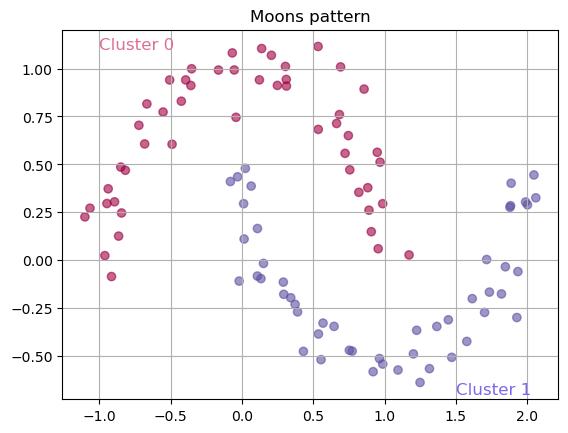

In [4]:
def visualize_feeding_data():
    
    X, y = make_moons(noise=0.1, random_state=0) # label 0 - upper (violet red); label 1 - lower (slate blue)

    print('Feeding data and labels for each point')
    print(X.T, y)
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, alpha=0.6)
    plt.title("Moons pattern")

    # Annotate cluster labels
    plt.text(-1.0, 1.1, "Cluster 0", fontsize=12, color="palevioletred")
    plt.text(1.5, -0.7, "Cluster 1", fontsize=12, color="mediumslateblue")

    plt.grid(True)


    img_stream = io.BytesIO()
    plt.savefig(img_stream, format='png', bbox_inches='tight')
    img_stream.seek(0)
    img_base64 = base64.b64encode(img_stream.read()).decode('utf-8')
    plt.close()
    img_html = f"""
    <div style="text-align:center; margin-top:20px;">
        <img src="data:image/png;base64,{img_base64}" style="width: 40%;">
    </div>
    """
    display(HTML(img_html))

visualize_feeding_data()

### Activation (Sigmoid) function in python code

In [5]:
# Define the Sigmoid function
def g(x):
    return 1 / (1 + np.exp(-1 * x))

### For the comming calculation we also need to prepare the training data in way the neural network can use

In [6]:
# 3. Create training data and labels
def prepare_data():
    X, y = make_moons(noise=0.1, random_state=0)
    m = X.shape[0] # number of training samples
     
    A0 = X.T # Transposed input dataset
    Y = y.reshape(n[3], m) # Reshape provided y (vector) data to matrix

    return A0, Y, m

A0, Y, m = prepare_data()

### Everything we described for the Feed Forward process, we have to write down as code

In [7]:
# 4. Define the Feed Forward function
def feed_forward(A0):

    # layer 1 calculations
    Z1 = W1 @ A0 + b1
    A1 = g(Z1)
    
    # layer 2 calculation
    Z2 = W2 @ A1 + b2
    A2 = g(Z2)
    
    # layer 3 calculations
    Z3 = W3 @ A2 + b3
    A3 = g(Z3)

    cache = {
        "A0": A0,
        "A1": A1,
        "A2": A2
    }

    return A3, cache

### And here is what $\large ŷ$ looks like:

In [8]:
y_hat, cache = feed_forward(A0)
print(y_hat)

[[0.856442   0.85984254 0.85954393 0.86001659 0.86296562 0.85797462
  0.85738122 0.86346375 0.85897989 0.85806932 0.85842667 0.85919639
  0.86282372 0.85697547 0.85797199 0.8562168  0.85645035 0.85665435
  0.85666058 0.85779497 0.85814801 0.86165736 0.85824161 0.8629588
  0.86030096 0.86170965 0.85835597 0.85789484 0.86019965 0.86166515
  0.86118642 0.86338278 0.85916999 0.86266958 0.85809676 0.85637014
  0.85673439 0.85963837 0.86121421 0.8631214  0.85950586 0.86184879
  0.85913969 0.85871715 0.85849351 0.85675855 0.8565488  0.85745265
  0.85804979 0.85868035 0.85912571 0.8614253  0.85915642 0.85679162
  0.8571027  0.85850584 0.85720466 0.85750961 0.85634866 0.85830113
  0.85746204 0.85634139 0.86208523 0.86115047 0.86317616 0.86103328
  0.85644857 0.86154402 0.85730883 0.86035402 0.85680435 0.85625999
  0.861      0.85800525 0.85765047 0.8635069  0.85660415 0.85809309
  0.86296156 0.86248434 0.85624842 0.85656868 0.86134975 0.85920149
  0.85950513 0.86159124 0.86069609 0.85771476 0.8

Let’s interpret this output in a machine learning context. For each of the training samples, our network predicts that they are all around 60-70% probability beeing part of cluster 1. And if we round up the values 0.6-0.7 to 1, it means our model did extremely poor. If we run the model over and over again we will get diferent results. Some of them may be good, other pretty bad as the current one. It makes sense, since we initialized the weights and biases randomly — it’s just flipping a coin.

## Cost

As the intuition tell us we have to lower the cost to minimum. As low as possible. But what does that mean in a mathematical perspective. Let’s say the neural network is a blind man trying to descend down a foggy hill. It’s easy to get to the bottom because there’s only one “bottom” in a sense.

<div style="text-align: center;">
  <img src="6.png" alt="image" width="400">
</div>

The parabola above has only one minimum, called the global minimum. If a function has only one global minimum, this makes it a convex function, which is exactly what we look for in a cost function. Having only one global minimum means that you’re absolutely sure the cost can go as low as possible.

What if we were dealing with a non-convex function with many local minima? Then we could get stuck in a local minimal, never able to get out again.

<div style="text-align: center;">
  <img src="7.png" alt="image" width="400">
</div>

With non-convex cost functions, when trying to minimize the cost, it’s likely that the network will get stuck in a local minimum rather than at the desired global minimum.

For that reason, we’ll choose a convex cost function. For classification problems like these, where we want our final output to be between 0 and 1, we’ll use the **binary cross entropy loss function**:

$$\Large L(ŷ_iy_i) = -(y_i\: ln\:ŷ_i\: + (1 - y_i)\: ln(1 - ŷ_i)) $$
$$\small Error\: for\: a\: single\: training\: sample$$
$$\Large C = \frac{1}{m} \sum_{i=1}^{m} L(ŷ_i, y_i) $$
$$\small Cost\: over\: all\: training\: samples$$

> - $\large y_i$ : the training label output for the $i^{th}$ training sample.
> - $\large ŷ_i$: the model’s prediction for the $i^{th}$ training sample.

And our model needs that formula in a way it can understands it

In [9]:
# 5. Calculate cost
def cost(y_hat, y):
    """
      y_hat should be n^L x m matrix
      y should be n^L x m matrix
    """
    # 1. losses is a n^L x m
    losses = - ((y * np.log(y_hat)) + (1 - y) * np.log(1 - y_hat))

    m = y_hat.reshape(-1).shape[0]

    # 2. summing across axis = 1 means we sum across rows, 
    #    making this a n^L x 1 matrix
    
    summed_losses = (1 / m) * np.sum(losses, axis=1)

    return np.sum(summed_losses)

We can see what the initial cost our network is:

In [10]:
cost(y_hat, Y)

1.0500695909567552

## Backpropagation

The parameters of the backpropagarion are just weights and biases, so $W^{l}$ and $b^{l}$ for all layers in the network starting at $l=1$. For our network, $\nabla C$ would look something like this:

$$\Large
\nabla C =
\left[ 
{\begin{array}{cc}
\frac{\partial C}{\partial W^{[1]}},
\frac{\partial C}{\partial W^{[2]}},
\frac{\partial C}{\partial W^{[3]}},
\frac{\partial C}{\partial b^{[1]}},
\frac{\partial C}{\partial b^{[2]}},
\frac{\partial C}{\partial b^{[3]}}
\end{array} } 
\right]
$$

$\nabla C$ represents how we should change each parameter to increase the cost as fast as possible. So we should do the opposite of that — head in the direction of the negative of the gradient to decrease the cost as fast as possible.

Important assurances we have to be careful for:

> - All the partial derivatives have the exact same dimensions as their normal variables. This means that $\large \frac{\partial C}{\partial W^{[1]}}$ should have the exact same dimensions as $W^{[1]}$. For any layer $l$, $\large \frac{\partial C}{\partial W^{[l]}}$ will have the same dimensions as $W^{[l]}$, $\large \frac{\partial C}{\partial b^{[1]}}$ will have the same dimensions as $b^{[1]}$, and $\large \frac{\partial C}{\partial A^{[l]}}$ will have the same dimensions as $\large A^{[l]}$
> - After successfully calculating the gradient $\nabla C$, we know in which direction to turn those parameters, but how much do we adject them. The answer is only a little, sinse if we turn them a lot we risk overshooting the minimum. When updating the weights matrix $W^{[1]}$ by $\large \frac{\partial C}{\partial b^{[1]}}$, we multiply that partial derivative calculation by some small value like 0.01.
> - We run the feed forward and backprop steps for at least thousand times since we take small steps each time.

To make a network learn, to solve any kind of machine learning problem, we need to minimize its cost function C. If our neural network has a cost of 0, it means it got no "questions" wrong in our test analogy, netting it a 100%.

How do we make our cost function as low as possible? We follow these steps:

> - Find the slope of the cost function, which we described as $\nabla C$. Use partial derivatives and chain rule to discover this value.
> - Update the parameters of the network in the **opposite** direction of the gradient. Take small proportional steps to the gradient.
> - Run the above steps again about 10K times

For all the math calculations, we will be using a vectorized approach across all training examples because it makes everything easier to understand. That’s why we used vectorization for the feed forward process as well.

Ok, so we want to find $\nabla C$. How do we do that?
Let's start small - we just find the gradient of cost with respect to the parameters in the final layer.

<div style="text-align: center;">
  <img src="8.png" alt="image" width="300">
</div>

> - The last layer in denoted $A^{[L]}$ with dimentions **1 x m**
> - The second to last layer is denoted $A^{[L-1]}$ with dimensions **3 x m**.
> - The weights layer connecting the last layer and second to last layer is $W^{[L]}$, with dimensions **1 x 3**.

Let’s say after a feed forward iteration we calculate $A^{[L]}$, which let’s us get the cost C. How do we change the weights in layer $L$ to reduce the cost? With partial derivatives. We ca describe what we want as $\large \frac{\partial C}{\partial W^{[l]}}$. After close look we actually can't find $W^{L}$ in the cost function. Here comes  the **Chain rule**. First we need to build a computation graph. Then we can build the tree and visualize the chain of partials to build. We get the computation graph from the feed forward calculations we did earlier, since that’s the only way you can compute the cost. Backprop is just finding the derivative of all the equations from feed forward. 

<div style="text-align: center;">
  <img src="9.png" alt="image" width="200">
</div>

$$\Large C = \frac{1}{m} \sum_{i=1}^{m} - (y_i\: ln\:ŷ_i\: + (1 - y_i)\: ln(1 - ŷ_i)) $$
$$\Large ŷ_i = A^{[L]} $$
$$\Large A^{[L]} = g(Z^{[L]})$$
$$\Large Z^{[L]} = W^{[L]}A^{[L-1]} + b^{[L]}$$

From this computation graph we can use the chain and tree approach to build out these equations

$$\Large \frac{\partial C}{\partial W^{[L]}} = \frac{\partial C}{\partial A^{[L]}} \frac{\partial A^{L}}{\partial Z^{[L]}} \frac{\partial Z^{[L]}}{\partial W^{[L]}} $$

Calculations for $\large \frac{\partial C}{\partial A^{[L]}}$

$$
\large \mathcal{L} = - \left( y \ln A^L + (1 - y) \ln (1 - A^L) \right)
$$
$$
\large \frac{\partial \mathcal{L}}{\partial A^L} = - \left( \frac{y}{A^L} (1) + \frac{1 - y}{1 - A^L} (-1) \right)
$$
$$
\large \frac{\partial \mathcal{L}}{\partial A^L} = - \frac{y}{A^L} + \frac{1 - y}{1 - A^L}
$$
$$
\large \frac{\partial \mathcal{C}}{\partial A^L} = -\frac{1}{m} \left( \frac{y}{A^L} - \frac{1 - y}{1 - A^L} \right)
$$

> - All the $\large A^{L}$ terms are wrapped in a natural log, so use the chain rule and derivative of ln rules to figure those out
> - We are taking the derivative with respect to $\large A^{[L]}$, so we treat that as a variable and everything else as a constant.
> - Keep the $\large \frac{1}{m}$ term in the cost.

We already know which matrix dimensions we want. If we are trying to find the gradient of cost with respect to weights in a layer, then that matrix better have the same dimensions as the normal weights matrix. In other words, $\large \frac{\partial \mathcal{C}}{\partial W^{L}}$ must have the same dimensions as $W^{[L]}$. $\large \frac{\partial \mathcal{C}}{\partial A^{L}}$ must have the same dimensions as $A^{[L]}$ and $\large \frac{\partial \mathcal{C}}{\partial b^{L}}$ must have the same dimensions as $b^{[L]}$. This pattern continues for all the layers

$$
\large g(z) = \sigma(z) = \frac{1}{1 + e^{-z}} = \left(1 + e^{-z}\right)^{-1}
$$
$$
\large g'(z) = -\frac{1}{(1 + e^{-z})^2} (e^{-z})(-1) = \frac{e^{-z}}{1 + e^{-z}}
$$
$$
\large g'(z) = \sigma(z) (1 - \sigma(z))
$$
$$
\large A^L = g(Z^L) = \sigma(Z^L)
$$
$$
\large \frac{\partial A^L}{\partial Z^L} = g'(Z^L) \cdot 1 = \sigma(Z^L)(1 - \sigma(Z^L)) = A^L (1 - A^L)
$$

> - We use the power rule from earlier
> - Use chain rule with $e^{-z}$ to get the inner derivative as $e^{-z} * -1 $
> - Use algebra to rearrange the product into just referring back to sigmoid
> - Do the same thing for $\frac{\partial A^L}{\partial Z^L} = g'(Z^L)$, where we substitute $\sigma(Z^{[L]})$ for $A^{[L]}$, since they are exactly equal.

We can finally multiply these two together element-wise and simplify our calculations to this:

$$\Large \frac{\partial C}{\partial Z^{[L]}} = \frac{\partial C}{\partial A^{[L]}} \frac{\partial A^{L}}{\partial Z^{[L]}} = \frac{1}{m}(A^{[L]} - y) $$

We can continue with the chain rule to get our desired calculations:

$$\Large Z^{[L]} = W^{[L]}A^{[L-1]} + b^{[L]}$$

$$\large \frac{\partial Z^{[L]}}{\partial W^{[L]}} = A^{[L-1]} $$

$$ \large \frac{\partial C^{L}}{\partial W^L} = \frac{\partial C^{L}}{\partial Z^L} \frac{\partial Z^{L}}{\partial W^L} = \frac{1}{m}(A^{[L]} - y)(A^{[L-1]})^T $$

> - Find $\large \frac{\partial Z^{[L]}}{\partial W^{[L]}}$. We treat $W^{[L]}$ as a variable and everything else as a constant, which gets us $A^{[L-1]}$.
> - Multiply $\large \frac{\partial C}{\partial Z^{[L]}}$ together with $\large \frac{\partial Z^{[L]}}{\partial W^{[L]}}$ as a part of the chain rule to get the answer. The matrix dimensions should match up.
> - We multiply $\large \frac{\partial C}{\partial Z^{[L]}}$ by the transpose of $A^{[L-1]}$ to get a $n^{[L]}$ x m times m x $n^{[L-1]}$ matrix multiplication series, giving us the exact dimensions of a n^[L] x n^[L-1] matrix.

We just did our first backprop calculation!
$\: \: \:$ $\large \frac{\partial C}{\partial W^{[L]}}$ represents how we should change the weights in layer L to change the cost most effectively, and with that alone we could reduce the cost. But we have more layers to do, and we must not forget the bias.

$$\Large Z^{[L]} = W^{[L]}A^{[L-1]} + b^{[L]}$$

$$\large \frac{\partial Z^{[L]}}{\partial b^{[L]}} = 1 $$

$$ \large \frac{\partial C^{L}}{\partial b^L} = \frac{\partial C}{\partial Z^L} \frac{\partial Z^{L}}{\partial b^L} = \frac{1}{m} \sum_{i=1}^{m}(a^{L(i)}-y^{i}) $$

> - Calculate $\large \frac{\partial Z^{[L]}}{\partial b^{[L]}}$, which is just 1, so multiplication with it doesn’t even matter.
> - Sum up the $\large \frac{\partial C^{[L]}}{\partial Z^{[L]}}$ matrix by its rows to end up with a $n^{[L]}$ x 1 matrix.

Going back to feed forward, we could only calculate the final output of the model $A^{[L]}$ by calculating all the outputs $a^{[l]}$ for each layer $l$? That’s our entire computation graph which we can then make partial derivatives from. We have three layers in our network, so here are the different partial derivatives we would need to calculate:

<div style="text-align: center;">
  <img src="10.png" alt="image" width="400">
</div>

Let’s follow the computation graph to reach $\large \frac{\partial C}{\partial W^2}$:

$$ \large \frac{\partial C}{\partial W^{[2]}} = \frac{\partial C}{\partial A^{[3]}} \frac{\partial A^{[3]}}{\partial Z^{[3]}} \frac{\partial Z^{[3]}}{\partial A^{[2]}} \frac{\partial A^{[2]}}{\partial Z^{[2]}} \frac{\partial Z^{[2]}}{\partial W^{[2]}} $$

Using the feed forward calculations, we can draw computation graph to get a sense of how the equations are connected to each other ($W^{[L]}$ contributes to $Z^{[L]}$, $Z^{[L]}$ contributes to $A^{[L]}$, etc.) and use the graph/tree to create a chain rule expression.

This expression looks messy, so let's use basic aspect of the chain rule to clean it up.

$$ \large \frac{\partial C}{\partial W^{[2]}} = \frac{\partial C}{\partial A^{[3]}} \frac{\partial A^{[3]}}{\partial Z^{[3]}} \frac{\partial Z^{[3]}}{\partial A^{[2]}} \frac{\partial A^{[2]}}{\partial Z^{[2]}} \frac{\partial Z^{[2]}}{\partial W^{[2]}} = \frac{\partial C}{\partial A^{[2]}} \frac{\partial A^{[2]}}{\partial Z^{[2]}} \frac{\partial Z^{[2]}}{\partial W^{[2]}} $$

Having just the calculations for layer L=3, we have no idea how to find something like $\large \frac{\partial A^{[2]}}{\partial Z^{[2]}}$, but we can definitely find out $\large \frac{\partial C}{\partial A^{[2]}}$.

$$\Large Z^{[3]} = W^{[3]}A^{[2]} + b^{[3]}$$
$$\Large A^{[3]} = \sigma(Z^{[3]}) $$

$$\large \frac{\partial Z^{[3]}}{\partial A^{[2]}} = W^{[3]} $$

$$\large \frac{\partial C}{\partial A^{[3]}} \frac{\partial A^{[3]}}{\partial Z^{[3]}} = \frac{1}{m} A^{[3]} - y $$

$$\large \frac{\partial C}{\partial A^{[2]}} = \frac{\partial Z^{[3]}}{\partial A^{[2]}} = (W^{[3]})^{T}(\frac{1}{m} A^{[3]} - y) $$

> - We already have the value $\large \frac{\partial C}{\partial Z^{[3]}}$ (which is a $n^{[3]}$ x m dimensional matrix) since layer 3 is our last layer, so we can multiply that by $\large \frac{\partial Z^{[3]}}{\partial A^{[2]}}$ to find $\large \frac{\partial C}{\partial A^{[2]}}$.
> - $\large \frac{\partial Z^{[3]}}{\partial A^{[2]}} = W^{[3]}$, which is the matrix of weights in the 3td/final layer, which has dimentions $n^{[3]}$ x $n^{[2]}$
> - The only way to multiply a $n^{[3]}$ x m matrix and a $n^{[3]}$ x $n^{[2]}$ matrix together is to make the weights matrix the first matrix in the multiplication and then transpose it. So we would get the transpose of $W^{[3]}$ times whatever $\large \frac{\partial C}{\partial Z^{[3]}}$ is.

The $\large \frac{\partial C}{\partial A^{[2]}}$ value we calculated we are going to call propagator, which we use to continue the backpropagation calculations for each layer. From the propagator we can derive all the important gradient values for a layer we want, like $\large \frac{\partial C}{\partial W^{[2]}}$ and $\large \frac{\partial C}{\partial b^{[2]}}$, which we wouldn’t have been able to reach otherwise.

In conclusion, the backprop algorithm is like so:

> - Calculate $\large \frac{\partial C}{\partial W^{[L]}}$ and $\large \frac{\partial C}{\partial b^{[L]}}$ for the final layer L.
> - Calculate the propagator for the penultimate layer $L-1$ by finding $\large \frac{\partial C}{\partial A^{[L-1]}}$.
> - For all layers $l$ starting from $l = L-1$, and going until the first layer $l=1$, we calculate $\large \frac{\partial C}{\partial W^{[l]}}$, $\large \frac{\partial C}{\partial b^{[l]}}$, and the propagator for the next layer $\large \frac{\partial C}{\partial A^{[l-1]}}$

## Update parameters

Now we calculated $\nabla C$, we can finally update our parameters accordingly to reduce the cost. This leads us to an algorithm called gradient descent, where by going in the opposite direction of the gradient, you can find the minimum of the function. A gradient was the slope of a multivariable function, and is the fastest way to increase the function Then the negative gradient is the exact opposite slope and the fastest way to decrease the function, so we always update parameters by the negative of the gradient. Let’s use the famous “hiking down a cliff” analogy to explain gradient descent. Pretend that there’s a blind hiker trying to find the quickest way downhill. At every single second in the journey, he always knows which direction is downhill, but it’s not that simple. If he takes large steps, the blind hiker might miss a tiny sliver of where the fastest downhill portion is. If he takes extremely small steps, then it’ll take forever for him to descend. The main idea is that we have no clue what the actual cost function looks like, since a cost function for a 10,000 parameter network is 10,000 dimensional. We can only act like the blind hiker, taking small steps and hoping we don’t miss our ticket to the valley. This is where the idea of the learning rate comes in. It regulates how big or small our steps are in a sense. We multiply the learning rate by the negative of the gradient and then add that to our parameters to update them. We denote the learning rate as the Greek symbol $\alpha$ Here is how we update the parameters for any layer with gradient descent:

$$\large W^{[l]} = W^{[l]} - \alpha \frac{\partial C}{\partial W^{[l]}}$$

$$\large b^{[l]} = b^{[l]} - \alpha \frac{\partial C}{\partial b^{[l]}}$$

Because we only take small steps, we have to repeat the backpropagation process over and over again.

## The training algorithm

We saw how to calculate an output for the network with feed forward, and even how to update the model parameters with backpropagation.

But those are just the lego pieces — where’s the finished product? It’s nothing but feed forward and backprop a thousand times over.

> - Use feed forward to calculate the network output $ŷ$
> - Calculate the cost $C$ from the network output $ŷ$ and the training labels $y$.
> - Save the cost to a list of costs. This is useful in diagnosing if our model is converging to a minimum cost correctly.
> - Run backpropagation to compute $\nabla C$ ( $\large \frac{\partial C}{\partial W^{[l]}}$ and $\large \frac{\partial C}{\partial b^{[l]}}$ for each layer $l$ ).
> - Update the parameters using the learning rate you set. A good default is $\alpha$ = 0.01.
> - Repeat steps until me don\t see any improvement in the learning curve or in other words until the cost barely stops decreasing

## Build that network

Let's translate and write down all math until now into python code and get all layer L calculations

In [11]:
def backprop_layer_3(y_hat, Y, m, A2, W3):
  A3 = y_hat
  
  # step 1. calculate dC/dZ3 using shorthand
  dC_dZ3 = (1/m) * (A3 - Y)
  assert dC_dZ3.shape == (n[3], m)


  # step 2. calculate dC/dW3 = dC/dZ3 * dZ3/dW3 
  #   we matrix multiply dC/dZ3 with (dZ3/dW3)^T
  dZ3_dW3 = A2
  assert dZ3_dW3.shape == (n[2], m)

  dC_dW3 = dC_dZ3 @ dZ3_dW3.T
  assert dC_dW3.shape == (n[3], n[2])

  # step 3. calculate dC/db3 = np.sum(dC/dZ3, axis=1, keepdims=True)
  dC_db3 = np.sum(dC_dZ3, axis=1, keepdims=True)
  assert dC_db3.shape == (n[3], 1)

  # step 4. calculate propagator dC/dA2 = dC/dZ3 * dZ3/dA2
  dZ3_dA2 = W3 
  dC_dA2 = W3.T @ dC_dZ3
  assert dC_dA2.shape == (n[2], m)

  return dC_dW3, dC_db3, dC_dA2

In [12]:
def backprop_layer_2(propagator_dC_dA2, A1, A2, W2):

  # step 1. calculate dC/dZ2 = dC/dA2 * dA2/dZ2

  # use sigmoid derivation to arrive at this answer:
  #   sigmoid'(z) = sigmoid(z) * (1 - sigmoid(z))
  #     and if a = sigmoid(z), then sigmoid'(z) = a * (1 - a)
  dA2_dZ2 = A2 * (1 - A2)
  dC_dZ2 = propagator_dC_dA2 * dA2_dZ2
  assert dC_dZ2.shape == (n[2], m)


  # step 2. calculate dC/dW2 = dC/dZ2 * dZ2/dW2 
  dZ2_dW2 = A1
  assert dZ2_dW2.shape == (n[1], m)

  dC_dW2 = dC_dZ2 @ dZ2_dW2.T
  assert dC_dW2.shape == (n[2], n[1])

  # step 3. calculate dC/db2 = np.sum(dC/dZ2, axis=1, keepdims=True)
  dC_db2 = np.sum(dC_dW2, axis=1, keepdims=True)
  assert dC_db2.shape == (n[2], 1)

  # step 4. calculate propagator dC/dA1 = dC/dZ2 * dZ2/dA1
  dZ2_dA1 = W2
  dC_dA1 = W2.T @ dC_dZ2
  assert dC_dA1.shape == (n[2], m)

  return dC_dW2, dC_db2, dC_dA1

In [13]:
def backprop_layer_1(propagator_dC_dA1, A1, A0, W1):

  # step 1. calculate dC/dZ1 = dC/dA1 * dA1/dZ1

  # use sigmoid derivation to arrive at this answer:
  #   sigmoid'(z) = sigmoid(z) * (1 - sigmoid(z))
  #     and if a = sigmoid(z), then sigmoid'(z) = a * (1 - a)
  dA1_dZ1 = A1 * (1 - A1)
  dC_dZ1 = propagator_dC_dA1 * dA1_dZ1
  assert dC_dZ1.shape == (n[1], m)


  # step 2. calculate dC/dW1 = dC/dZ1 * dZ1/dW1 
  dZ1_dW1 = A0
  assert dZ1_dW1.shape == (n[0], m)

  dC_dW1 = dC_dZ1 @ dZ1_dW1.T
  assert dC_dW1.shape == (n[1], n[0])

  # step 3. calculate dC/db1 = np.sum(dC/dZ1, axis=1, keepdims=True)
  dC_db1 = np.sum(dC_dW1, axis=1, keepdims=True)
  assert dC_db1.shape == (n[1], 1)

  return dC_dW1, dC_db1

The backprop calculations for layer L return these values:

> - $dC\_dW^{[l]}$: the partial derivative of the cost with respect to the weights in current layer. We use this value to adjust the weights in current layer.
> - $dC\_db^{[l]}$: the partial derivative of the cost with respect to the biases in current layer. We use this value to adjust the biases in current layer.
> - $dC\_dA^{[l]}$: the propagator term that lets us continue the chain so we can calculate the derivatives in current layer.

## Training

This allows us to get the cost of the neural network on each iteration.

In [14]:
def train():
  # must use global keyword in order to modify global variables
  global W3, W2, W1, b3, b2, b1

  alpha = 0.1 # set learning rate to 0.1
  costs = [] # list to store costs

  for e in range(epochs):
    # 1. FEED FORWARD
    y_hat, cache = feed_forward(A0)
    
    # 2. COST CALCULATION
    error = cost(y_hat, Y)
    costs.append(error)

    # 3. BACKPROP CALCULATIONS

    dC_dW3, dC_db3, dC_dA2 = backprop_layer_3(
        y_hat, 
        Y, 
        m, 
        A2= cache["A2"], 
        W3=W3
    )

    dC_dW2, dC_db2, dC_dA1 = backprop_layer_2(
        propagator_dC_dA2=dC_dA2, 
        A1=cache["A1"],
        A2=cache["A2"],
        W2=W2
    )

    dC_dW1, dC_db1 = backprop_layer_1(
        propagator_dC_dA1=dC_dA1, 
        A1=cache["A1"],
        A0=cache["A0"],
        W1=W1
    )

    # 4. UPDATE WEIGHTS
    W3 = W3 - (alpha * dC_dW3)
    W2 = W2 - (alpha * dC_dW2)
    W1 = W1 - (alpha * dC_dW1)

    b3 = b3 - (alpha * dC_db3)
    b2 = b2 - (alpha * dC_db2)
    b1 = b1 - (alpha * dC_db1)
  
  return costs

How do we know if our neural network worked? Well if the cost decreased, that’s a pretty good indicator that we have improved on our training data. Let’s check it out:

In [15]:
costs = train()
iterations = np.linspace(0, epochs, epochs)

### Plot result


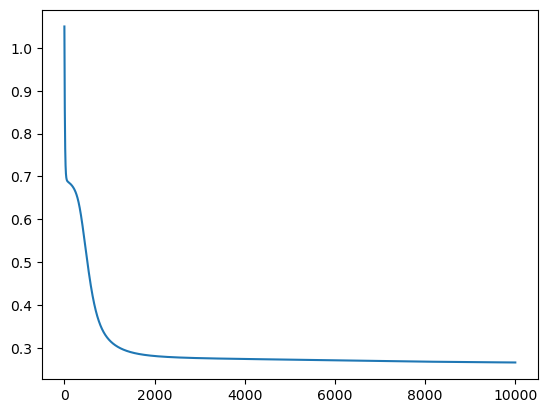

In [16]:
def visualize_cost():
    plt.plot(iterations, costs)
    img_stream = io.BytesIO()
    plt.savefig(img_stream, format='png', bbox_inches='tight')
    img_stream.seek(0)
    img_base64 = base64.b64encode(img_stream.read()).decode('utf-8')
    plt.close()
    img_html = f"""
    <div style="text-align:center; margin-top:20px;">
        <img src="data:image/png;base64,{img_base64}" style="width: 40%;">
    </div>
    """
    display(HTML(img_html))
visualize_cost()

We flatlined after about 5000 iterations, so it seems the the rest until 10K were unnecessary.

Great! Now we have test our model somehow, to see what it has "learned". We'll create a function that takes in any point coordinates and pass them into the model. The result will be 0 or 1 depending in which cluster the point is enrolled.

In [17]:
def predict(X_input):
    Z1 = W1 @ X_input + b1
    A1 = g(Z1)
    
    Z2 = W2 @ A1 + b2
    A2 = g(Z2)
    
    Z3 = W3 @ A2 + b3
    A3 = g(Z3)

    return A3

This function mirrors feed_forward() but is focused purely on returning the output prediction. Next function illustrates the clusters and the point we are observing

Test Point: [-1.3  0. ], Prediction: 0.2998, Cluster: 0



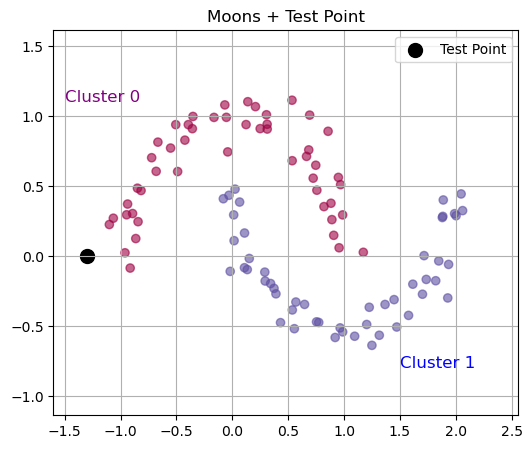

Test Point: [-1.  1.], Prediction: 0.0159, Cluster: 0



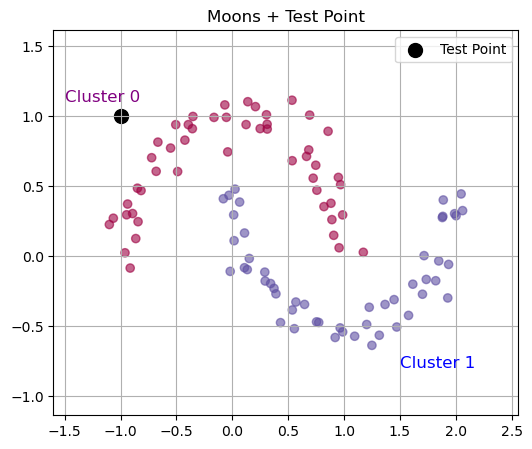

Test Point: [0.5 0.3], Prediction: 0.3980, Cluster: 0



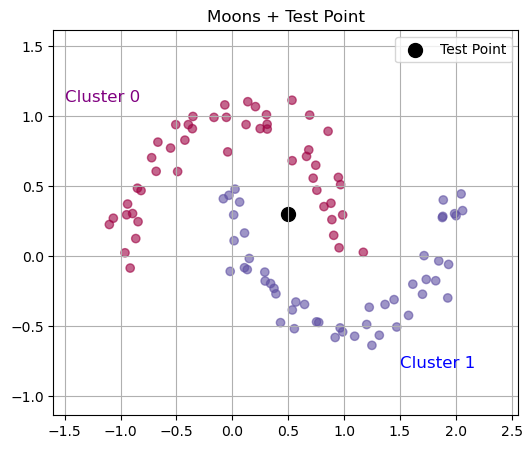

Test Point: [2.  0.5], Prediction: 0.5938, Cluster: 1



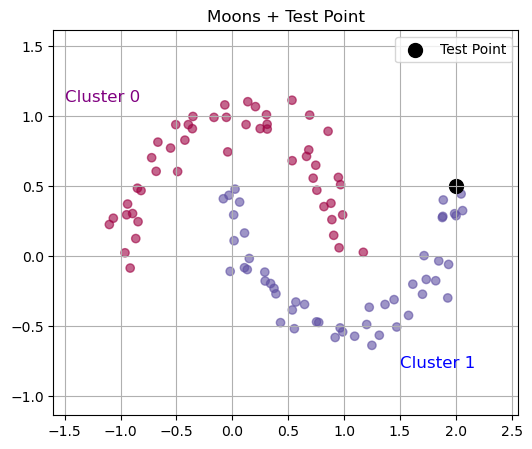

Test Point: [ 1.  -0.5], Prediction: 0.9849, Cluster: 1



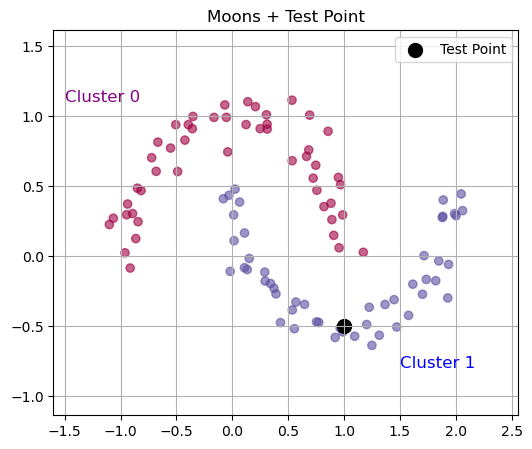

Test Point: [-0.5 -0.5], Prediction: 0.9462, Cluster: 1



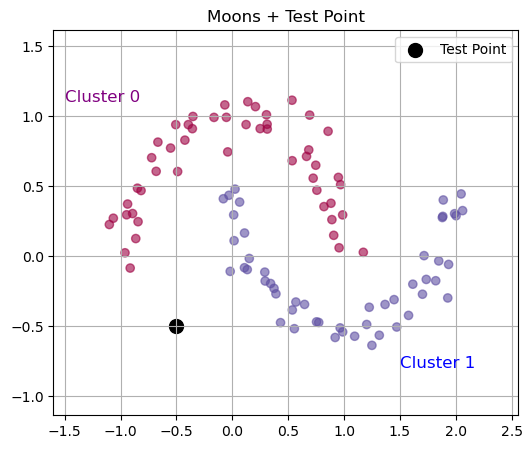

Test Point: [1 0], Prediction: 0.8929, Cluster: 1



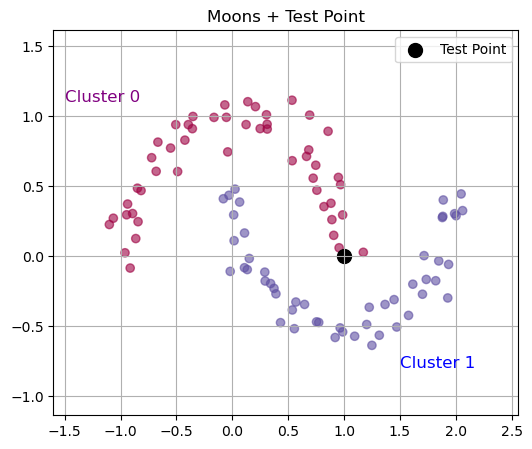

In [18]:
def visualize_test_point_on_moons(test_point):
    # Predict
    prediction = predict(test_point)[0, 0]
    predicted_class = int(prediction > 0.5)
    print(f"Test Point: {test_point.ravel()}, Prediction: {prediction:.4f}, Cluster: {predicted_class}")

    # Set color of the random point
    color = "black"

    # Axis limits based on moon data
    x_min, x_max = A0[0, :].min() - 0.5, A0[0, :].max() + 0.5
    y_min, y_max = A0[1, :].min() - 0.5, A0[1, :].max() + 0.5

    # Plot
    plt.figure(figsize=(6, 5))
    plt.scatter(A0[0, :], A0[1, :], c=Y.ravel(), cmap=plt.cm.Spectral, alpha=0.6)
    plt.scatter(test_point[0], test_point[1], color=color, s=100, edgecolors="k", label="Test Point")

    # Annotate cluster labels
    plt.text(-1.5, 1.1, "Cluster 0", fontsize=12, color="purple")
    plt.text(1.5, -0.8, "Cluster 1", fontsize=12, color="blue")

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title("Moons + Test Point")
    plt.grid(True)
    plt.legend()
    
    img_stream = io.BytesIO()
    plt.savefig(img_stream, format='png', bbox_inches='tight')
    img_stream.seek(0)
    img_base64 = base64.b64encode(img_stream.read()).decode('utf-8')
    plt.close()
    img_html = f"""
    <div style="text-align:center; margin-top:20px;">
        <img src="data:image/png;base64,{img_base64}" style="width: 40%;">
    </div>
    """
    display(HTML(img_html))

visualize_test_point_on_moons(np.array([[-1.3], [0.0]]))
visualize_test_point_on_moons(np.array([[-1.0], [1.0]]))
visualize_test_point_on_moons(np.array([[0.5], [0.3]]))
visualize_test_point_on_moons(np.array([[2.0], [0.5]]))
visualize_test_point_on_moons(np.array([[1.0], [-0.5]]))
visualize_test_point_on_moons(np.array([[-0.5], [-0.5]]))
visualize_test_point_on_moons(np.array([[1], [0]]))

Looks good? Not exactly! Lets analize the diagrams. All of the results looks like the model predicts well, except the last one. We clearly see that the point should be part of cluster 0. But the model decides that it is part of cluster 1. Fortunately we have a trick in our sleeve. We can draw the **Decision boundary** of our model. We can visualize how the model splits the space, generate a meshgrid and color each region by model output


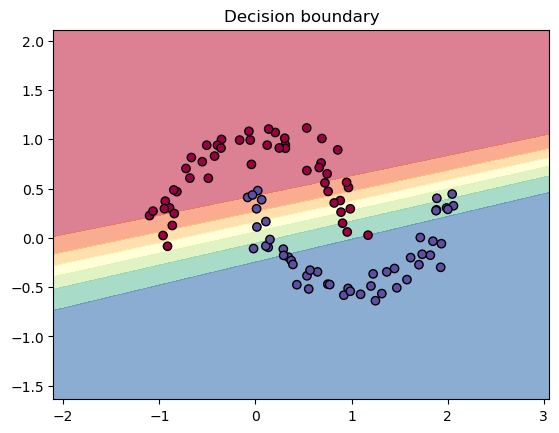

In [19]:
def plot_decision_boundary():
    h = 0.01
    x_min, x_max = A0[0, :].min() - 1, A0[0, :].max() + 1
    y_min, y_max = A0[1, :].min() - 1, A0[1, :].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    grid_points = np.c_[xx.ravel(), yy.ravel()].T  # shape: (2, N)
    Z = predict(grid_points)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.6)
    plt.scatter(A0[0], A0[1], c=Y.ravel(), cmap=plt.cm.Spectral, edgecolors='k')
    plt.title("Decision boundary")
    
    img_stream = io.BytesIO()
    plt.savefig(img_stream, format='png', bbox_inches='tight')
    img_stream.seek(0)
    img_base64 = base64.b64encode(img_stream.read()).decode('utf-8')
    plt.close()
    img_html = f"""
    <div style="text-align:center; margin-top:20px;">
        <img src="data:image/png;base64,{img_base64}" style="width: 40%;">
    </div>
    """
    display(HTML(img_html))

plot_decision_boundary()

Looking at the plot we get a little concerned. The decision boundary is too linear, the cost is in it's lowest value and totally flatlined, so more training iterations won't bring us any benefit. But somehow we would like the boundary to be curved and pass just between the clusters. That suggests of an issue - insufficient model capacity. If our neural network has too few hidden neurons or layers, it can't model the non-linearity needed to separate moon shapes. We have already created and calculated our network to work and train with two hidden layer. But we can increase the number of nodes and iterations easly! Let's adjust the model and rerun all steps.

In [20]:
L = 3 # number of layers
n = [2, 10, 10, 1] # layer distribution - hidden layers nodes increased from 3 to 10
epochs = 100000 # training iterations

W1 = np.random.randn(n[1], n[0])
W2 = np.random.randn(n[2], n[1])
W3 = np.random.randn(n[3], n[2])
b1 = np.random.randn(n[1], 1)
b2 = np.random.randn(n[2], 1)
b3 = np.random.randn(n[3], 1)

### New neural network diagram

<div style="text-align: center;">
  <img src="11.png" alt="image" width="400">
</div>

### Train the model

In [21]:
costs = train()
iterations = np.linspace(0, epochs, epochs)

### Plot result


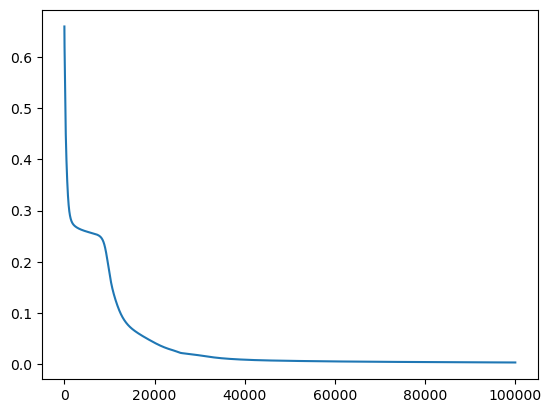

In [22]:
def visualize_cost():
    plt.plot(iterations, costs)
    img_stream = io.BytesIO()
    plt.savefig(img_stream, format='png', bbox_inches='tight')
    img_stream.seek(0)
    img_base64 = base64.b64encode(img_stream.read()).decode('utf-8')
    plt.close()
    img_html = f"""
    <div style="text-align:center; margin-top:20px;">
        <img src="data:image/png;base64,{img_base64}" style="width: 40%;">
    </div>
    """
    display(HTML(img_html))
visualize_cost()

The learning curve is flattening after ~50k iterations, but the more important part is that the cost is close to zero. And this is exactly what we want!

### Decision boundary diagram


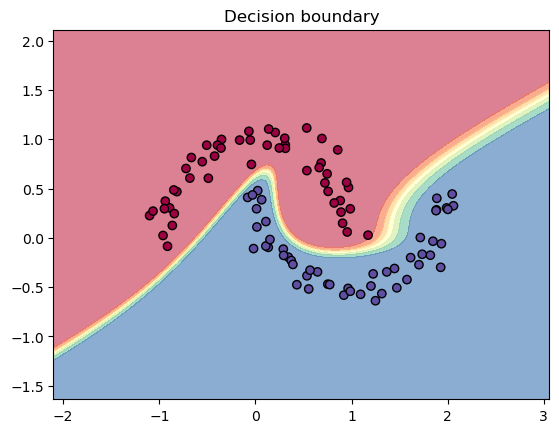

In [23]:
plot_decision_boundary()

Well this now make sense!

### Visualize problematic test point

Test Point: [1 0], Prediction: 0.0354, Cluster: 0



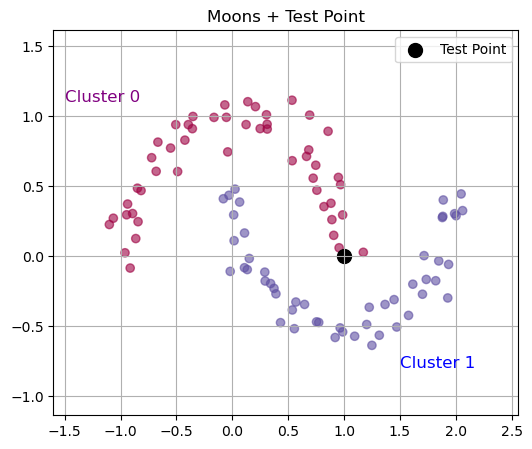

In [24]:
visualize_test_point_on_moons(np.array([[1], [0]]))

The problematic point we had earlier, now is distributed to the proper cluster.

## Conclusion

This project explored the inner workings of neural networks, focusing on the mathematical foundation behind forward and backward propagation. We derived and visualized key formulas such as the sigmoid function and its derivatives, as well as the loss and cost gradients. Through custom code and diagrams, we demonstrated how weights, biases, and activation functions interact. The result is a complete view of how neural networks learn from data.

### Resources
> - Medium tutorial - [Create neural network from scratch](https://medium.com/@waadlingaadil/learn-to-build-a-neural-network-from-scratch-yes-really-cac4ca457efc)
> - Scikit learn - [Datasets](https://scikit-learn.org/stable/datasets/sample_generators.html)
> - Geogebra - [Function visualization](https://www.geogebra.org/classic)
> - Wikipedia - [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function)
> - Geeks for geeks - [Binary Cross Entropy/Log Loss for Binary Classification](https://www.geeksforgeeks.org/binary-cross-entropy-log-loss-for-binary-classification/)
> - ChatGpt - [Plotting results](https://chatgpt.com/)
> - Latex - [Markdown cheatsheet](https://www.cmor-faculty.rice.edu/~heinken/latex/symbols.pdf)
> - Softuni - [Calculus](https://softuni.bg/trainings/4651/math-concepts-for-developers-march-2025#lesson-88042)

### GitHub Repo

> - You can find the public repository in Github [here](https://github.com/Bebrevski/basic-neural-network/blob/main/Neural%20network.ipynb)

### Python code used for plotting all diagrams 


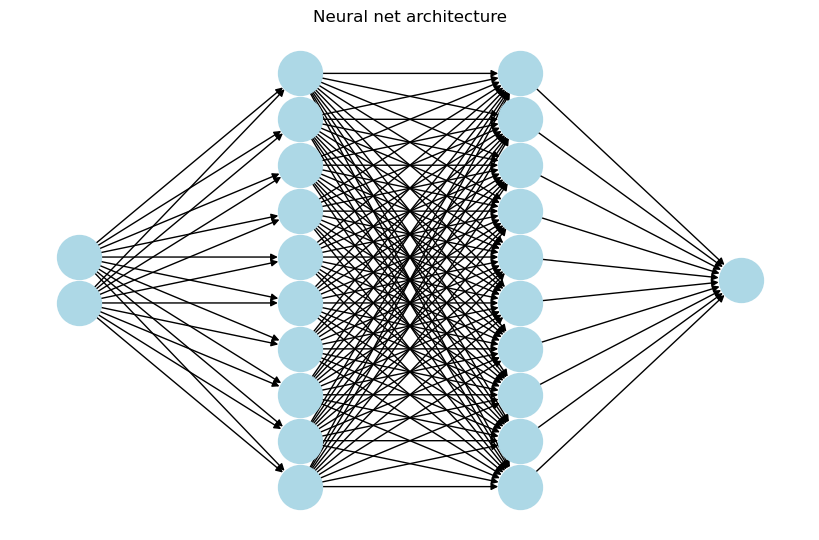

In [25]:
def visualize_neural_net_architecture():
    # Schema of the neural network
    G = nx.DiGraph()
    
    # Adjust spacing
    vertical_spacing = 1.5
    horizontal_spacing = 2
    
    # Position nodes
    pos = {}
    for layer_idx, num_nodes in enumerate(n):
        for node_idx in range(num_nodes):
            x = layer_idx * horizontal_spacing
            y = (num_nodes - 1 - node_idx) * vertical_spacing - (num_nodes - 1) * vertical_spacing / 2
            node_name = f"L{layer_idx}N{node_idx}"
            G.add_node(node_name)
            pos[node_name] = (x, y)
    
    # Add edges
    for layer_idx in range(len(n) - 1):
        for src in range(n[layer_idx]):
            for dst in range(n[layer_idx + 1]):
                G.add_edge(f"L{layer_idx}N{src}", f"L{layer_idx + 1}N{dst}")
    
    # Draw the graph
    plt.figure(figsize=(8, 5))
    nx.draw(G, pos, with_labels=False, node_size=1000, node_color="lightblue", arrows=True)
    
    plt.title("Neural net architecture")
    plt.axis("off")
    
    # Center the figure
    img_stream = io.BytesIO()
    plt.savefig(img_stream, format='png', bbox_inches='tight')
    img_stream.seek(0)
    img_base64 = base64.b64encode(img_stream.read()).decode('utf-8')
    plt.close()
    img_html = f"""
    <div style="text-align:center; margin-top:20px;">
        <img src="data:image/png;base64,{img_base64}" style="width: 40%;">
    </div>
    """
    display(HTML(img_html))

visualize_neural_net_architecture()


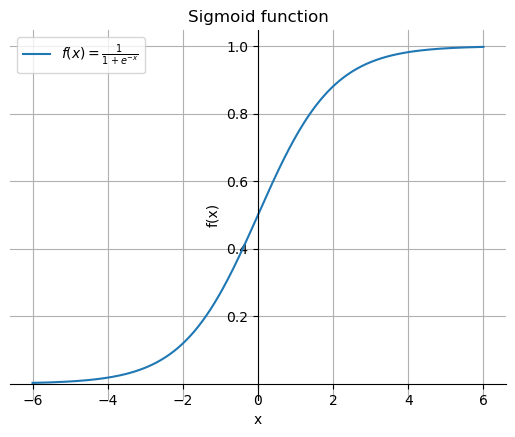

In [26]:
def visualize_sigmoid_function():
    sigmoid_x = np.linspace(-6, 6, 1000)
    sigmoid_y = 1 / (1 + np.exp(-sigmoid_x))
    
    ax = plt.gca() 
    ax.spines["bottom"].set_position("zero") 
    ax.spines["left"].set_position("zero") 
    ax.spines["top"].set_visible(False) 
    ax.spines["right"].set_visible(False) 
    
    ax.set_yticks([tick for tick in ax.get_yticks() if tick != 0])
    ax.annotate("0", xy = (-0.4, -1))
    
    plt.plot(sigmoid_x, sigmoid_y)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend([r"$f(x) = \frac{1}{1 + e^{-x}}$"])
    plt.grid()
    plt.title("Sigmoid function")
    
    img_stream = io.BytesIO()
    plt.savefig(img_stream, format='png', bbox_inches='tight')
    img_stream.seek(0)
    img_base64 = base64.b64encode(img_stream.read()).decode('utf-8')
    plt.close()
    img_html = f"""
    <div style="text-align:center; margin-top:20px;">
        <img src="data:image/png;base64,{img_base64}" style="width: 40%;">
    </div>
    """
    display(HTML(img_html))

visualize_sigmoid_function()


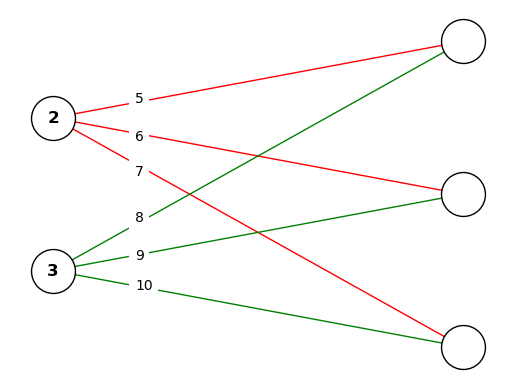

In [27]:
def visualize_weights():
    G = nx.DiGraph()

    positions = {
        '2': (0, 1),
        '3': (0, -1),
        'h1': (2, 2),
        'h2': (2, 0),
        'h3': (2, -2),
    }
    
    edges = [
        ('2', 'h1', 5, 'red'),
        ('2', 'h2', 6, 'red'),
        ('3', 'h1', 8, 'green'),
        ('3', 'h2', 9, 'green'),
        ('3', 'h3', 10, 'green'),
        ('2', 'h3', 7, 'red')
    ]
    
    for src, dst, label, color in edges:
        G.add_edge(src, dst, weight=label, color=color)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos=positions, node_color='white', edgecolors='black', node_size=1000)
    
    # Draw edges
    edge_colors = [G[u][v]['color'] for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos=positions, edge_color=edge_colors, arrows=False)
    
    nx.draw_networkx_labels(G, pos={k: positions[k] for k in ['2', '3']},
                            labels={'2': '2', '3': '3'},
                            font_size=12, font_weight='bold')
    
    # Manually add edge labels to avoid overlap
    offsets = {
        ('2', 'h1'): (-0.6, -0.3),
        ('2', 'h2'): (-0.6, 0.2),
        ('3', 'h1'): (-0.6, -0.85),
        ('3', 'h2'): (-0.6, -0.35),
        ('3', 'h3'): (-0.6, 0.25),
        ('2', 'h3'): (-0.6, 0.75),
    }
    
    for (u, v), (dx, dy) in offsets.items():
        x = (positions[u][0] + positions[v][0]) / 2 + dx
        y = (positions[u][1] + positions[v][1]) / 2 + dy
        label = G[u][v]['weight']
        plt.text(x, y, str(label), fontsize=10, bbox=dict(facecolor='white', edgecolor='none'))
    
    plt.axis('off')
    
    img_stream = io.BytesIO()
    plt.savefig(img_stream, format='png', bbox_inches='tight')
    img_stream.seek(0)
    img_base64 = base64.b64encode(img_stream.read()).decode('utf-8')
    plt.close()
    img_html = f"""
    <div style="text-align:center; margin-top:20px;">
        <img src="data:image/png;base64,{img_base64}" style="width: 40%;">
    </div>
    """
    display(HTML(img_html))

visualize_weights()

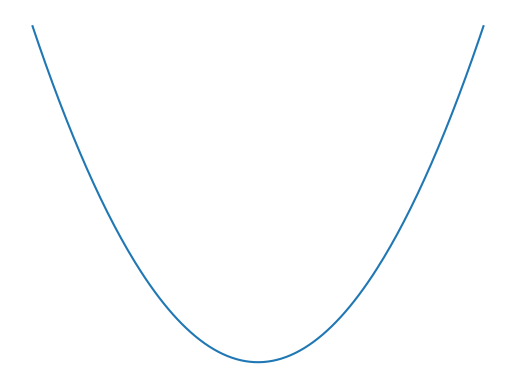

In [28]:
def visualize_parabola():
    x = np.linspace(-10, 10, 200)
    y = x**2
    
    plt.plot(x, y)
    plt.axis('off')  # Remove axes
    plt.show()

visualize_parabola()

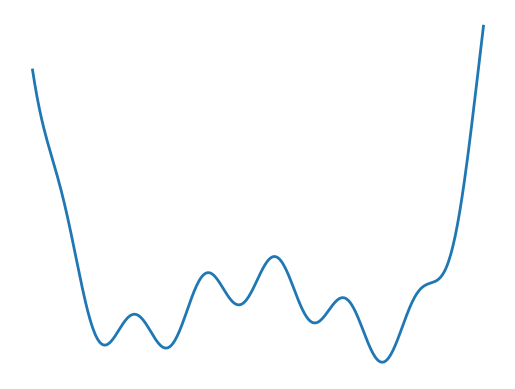

In [29]:
def f(x):
    return 0.1 * x**4 - x**2 + np.sin(5 * x)

def visualize_non_convex_function():
    # Generate x values
    x = np.linspace(-4, 4, 400)
    y = f(x)
    
    # Plot the function
    plt.plot(x, y, linewidth=2)
    plt.axis('off')  # Hide axes
    plt.show()

visualize_non_convex_function()

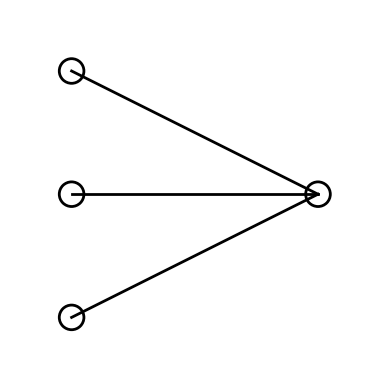

In [30]:
def visualize_last_layer():
    # Node coordinates
    input_layer = [(0, 2), (0, 1), (0, 0)]
    output_layer = [(2, 1)]
    
    # Start plot
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.axis('off')
    
    # Draw nodes
    for x, y in input_layer + output_layer:
        circle = plt.Circle((x, y), 0.1, edgecolor='black', facecolor='white', lw=2)
        ax.add_patch(circle)
    
    # Draw connections
    for (x1, y1) in input_layer:
        for (x2, y2) in output_layer:
            ax.plot([x1, x2], [y1, y2], color='black', lw=2)
    
    # Set plot limits
    ax.set_xlim(-0.5, 2.5)
    ax.set_ylim(-0.5, 2.5)
    
    plt.show()

visualize_last_layer()